In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

Assuming incident energy envelope on the lenslet ranging from -90 to +90 degree with:
1. mean of 0 (vertical incidence)
2. std dev (3sigma = 90 degree) = 30 degree

In [84]:
mu = 0 
sigma = 30
s = np.random.normal(mu, sigma, 100000)

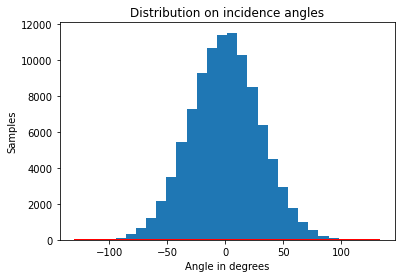

In [86]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=False)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.title('Distribution on incidence angles')
plt.xlabel('Angle in degrees')
plt.ylabel('Samples')
plt.show()

For TIR - reflected ray hits the internal surface at angle incident angle + 2*(wedge angle)

<img src="fig.png">

In [87]:
def calculate_reflection(incident_angle, wedge_angle):
    ### Assuming perfect mirror, spectral independence, and specular reflection
    ### absoprtion == 0
    ### incident_angle measured w.r.t verticle 
    if incident_angle <0:
        return -incident_angle + 2 * wedge_angle
    else:
        return incident_angle + 2 * wedge_angle

Run basic Monte Carlo:
1. Iterate of wedge angles going from 0 to 45 degrees 
2. Sample incident angles from the distribution "S" defined above
3. Calculate fraction of energy trapped for each wedge angle

In [88]:
response = {}
for wedge_angle in range(0, 50, 5):
    incident_angle = np.random.choice(s, 5000)
    response[wedge_angle] = np.fromiter((calculate_reflection(xi, 5) for xi in incident_angle), 
                                         incident_angle.dtype)

Aggregate the rays over 5 degree intervals 

In [89]:
bins = list(range(0, 95, 5))
responsedf = pd.DataFrame(response)

In [90]:
CRIT_ANG = 50 #critical angle in degrees for the medium 

In [91]:
PCT_POW = {}
for i in responsedf.columns.values:
    uplim = [x.right for x in pd.cut(responsedf[i], bins).value_counts().index.values]
    vals = list(pd.cut(responsedf[5], bins).value_counts().values)
    oplst = np.asarray(list(zip(uplim, vals)))
    PCT_POW[i] = 100* (oplst[oplst[:,0] > CRIT_ANG, 1].sum() / oplst[:, 1].sum())

In [104]:
print ("average power: {}".format(np.array(list(PCT_POW.values())).mean()))

average power: 18.262447087280794
